<a href="https://colab.research.google.com/github/blancavazquez/taller-linux/blob/main/vision/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica con el modelo RF


El objetivo de esta libreta es entrenar un modelo de árboles aleatorios usando el conjunto de datos de Iris.

In [ ]:
#Carga bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

Carga de la base de datos de Iris

In [ ]:
iris = load_iris()

In [ ]:
#Para facilitar el manejo de los datos, los convertimos a un dataframe
df_iris= pd.DataFrame(data=iris.data,  columns=iris.feature_names)
df_iris['especies'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Dividir los datos en conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

#Se separan las variables dependientes de la independiente
x=df_iris.iloc[:,:-1]
y=df_iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred=model.predict(x_test)

## Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556

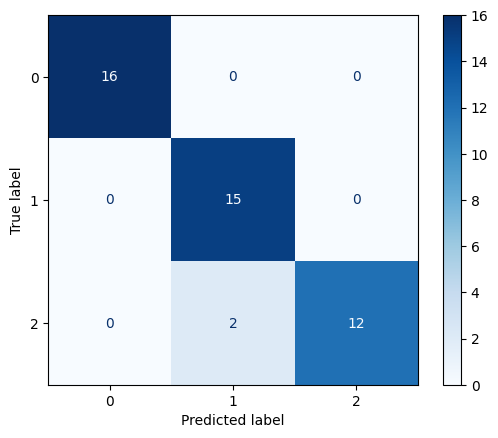

In [ ]:
#Visualizando la matriz de confusións
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.94        15
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

